In [112]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [160]:
df = pd.read_csv('allClasses//SignalBooleanChangeResponses.csv', header=None)

second_layer_cells = np.fromfile('allClasses//second_layer.txt', sep='\n', dtype=int)

In [161]:
df = df[df[1].isin(second_layer_cells)]

In [163]:
df

,0,1,2
114,1142,11939193,Spiked
121,1146,352598575,Spiked
122,1146,610454273,Spiked
124,1146,1250442005,Spiked
125,1146,730923082,Spiked
...,...,...,...
135412,499748,1754444726,Spiked
135421,499802,1250442005,Spiked
135422,499816,2097905212,Spiked
135424,499866,887750041,Spiked


In [164]:
spike_matrix_binned = np.zeros((len(set(df[1])), 500))

spike_times = list()
for cell_idx, (cell_hash, cell_group) in enumerate(df.groupby(1)):
    cell_spike_times = sorted(cell_group[0])
    spike_times.append(cell_spike_times)
    
    spike_matrix_binned[cell_idx] = np.histogram(cell_spike_times, bins=np.arange(0,501000, 1000))[0]

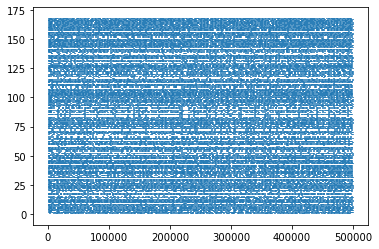

In [165]:
_ = plt.eventplot(spike_times)

In [185]:
act_pca = PCA().fit_transform(spike_matrix_binned.T)

In [186]:
import numpy_groupies as npg

In [187]:
avg_answer = npg.aggregate(([0,1,2,3,4,5,6,7,8,9]*50), spike_matrix_binned, axis=-1, func='mean')


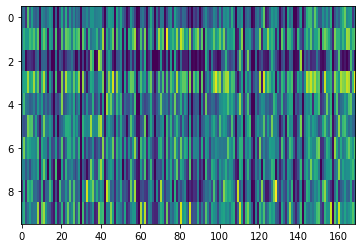

In [188]:
plt.imshow(avg_answer.T, aspect='auto', interpolation='none')

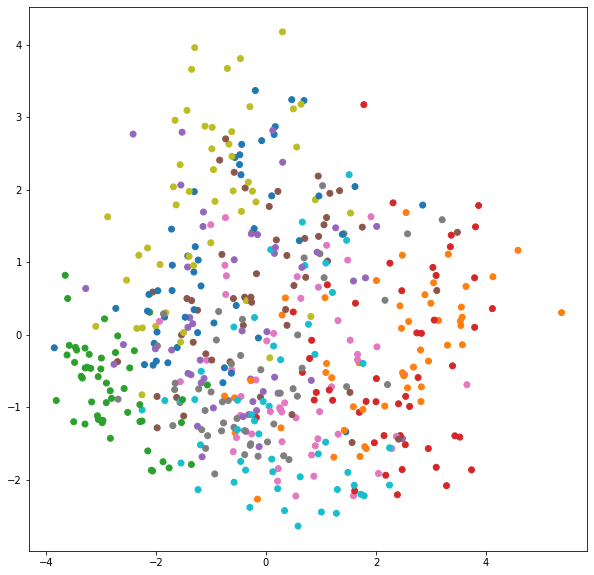

In [189]:
plt.figure(figsize=(10,10))
plt.scatter(act_pca[:, 0], act_pca[:, 1], c=([0,1,2,3,4,5,6,7,8,9]*50), cmap='tab10')

In [34]:
from sklearn.manifold import TSNE

In [95]:
weights1to2 = np.fromfile('latest///synapse1to2_weights.txt', sep='\n').reshape(169,9)
weights2to3 = np.fromfile('latest//synapse2to3_weights.txt', sep='\n').reshape(169, 25)

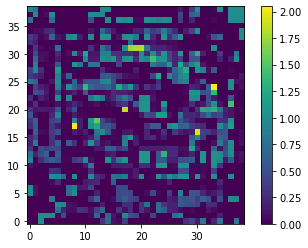

In [96]:
plt.imshow(get_2d_input_weights(weights1to2), origin='lower')
plt.colorbar()

(169, 9)

In [79]:
def get_2d_input_weights(weight_matrix):
    image_huge = np.concatenate([vector.reshape(3,3) for vector in weight_matrix])
    return np.concatenate(np.split(image_huge, 13), axis=-1)

array([[1.49799837e-02, 0.00000000e+00, 1.00101536e+00, ...,
        1.26290964e-07, 8.11526029e-01, 0.00000000e+00],
       [2.72775111e-03, 0.00000000e+00, 9.80133802e-01, ...,
        0.00000000e+00, 3.93925217e-07, 3.92166455e-07],
       [1.49779650e-02, 0.00000000e+00, 1.49799555e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.57575403e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000015e+00, 3.32991119e-07, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.51399793e-01, 7.74043133e-01, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

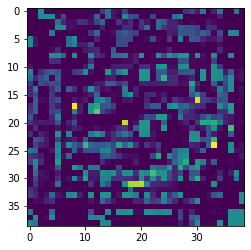

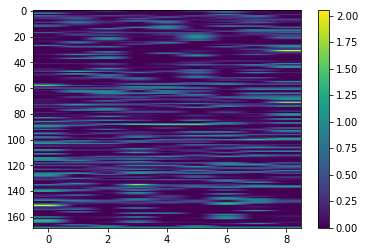

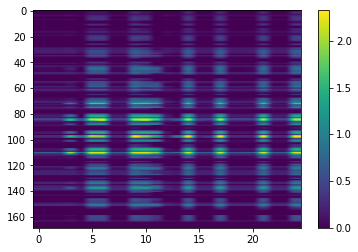

In [17]:
plt.imshow(weights2to3, aspect='auto')
plt.colorbar()

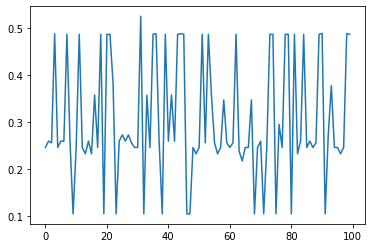

In [90]:
plt.plot(weights2to3[:, 5])

In [131]:
vals = [1]
for _ in range(100):
    vals.append(vals[~0]*0.9)

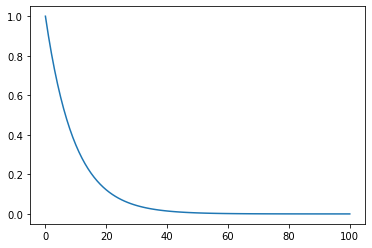

In [132]:
plt.plot(vals)

In [5]:
np.arange(1, 28, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27])